# KLASIFIKASI - DECISSION TREE

## Ridho Chaerullah 202231122

### Import Library

In [31]:
import pandas as pd # Mengimpor library Pandas untuk manipulasi data.
from matplotlib import pyplot as plt # Mengimpor pyplot dari Matplotlib untuk visualisasi data.
from sklearn.tree import DecisionTreeClassifier, plot_tree # Mengimpor DecisionTreeClassifier untuk membuat model klasifikasi berbasis pohon keputusan dan plot_tree untuk visualisasi struktur pohon.

In [32]:
# Membaca data dari file CSV K01_heart_disease.csv dan menyimpannya ke dalam DataFrame df.
df = pd.read_csv('K01_heart_disease.csv')
df # Menampilkan isi dari DataFrame df.

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [33]:
# Menampilkan statistik dasar dari data, seperti rata-rata, standar deviasi, nilai minimum, dan maksimum untuk setiap kolom numerik.
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [34]:
# Memberikan informasi tentang tipe data, jumlah nilai non-null, dan ukuran data di setiap kolom dalam DataFrame df.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [35]:
# Mengecek dan menampilkan jumlah nilai yang hilang (NaN) di setiap kolom.
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [36]:
# Menghitung jumlah baris duplikat dalam DataFrame df.
df.duplicated().sum()

0

In [37]:
# Menampilkan nilai unik dari setiap kolom dalam bentuk dictionary
for col in ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']: # Iterasi untuk menampilkan nilai unik di setiap kolom kategorikal (misalnya, jenis kelamin, tipe nyeri dada, dll.).
    print(f"{col}: {df[col].unique()}")

Sex: ['M' 'F']
ChestPainType: ['ATA' 'NAP' 'ASY' 'TA']
RestingECG: ['Normal' 'ST' 'LVH']
ExerciseAngina: ['N' 'Y']
ST_Slope: ['Up' 'Flat' 'Down']


In [38]:
# Mendefinisikan dictionary replace_mapping untuk mengganti nilai kategorikal dengan angka, memudahkan pengolahan data dalam model.
replace_mapping = {
    'Sex': {'M': 0, 'F': 1},
    'ChestPainType': {'ATA': 0, 'NAP': 1, 'ASY': 2, 'TA': 3},
    'RestingECG': {'Normal': 0, 'ST': 1, 'LVH': 2},
    'ExerciseAngina': {'N': 0, 'Y': 1},
    'ST_Slope': {'Up': 0, 'Flat': 1, 'Down': 2}
}

# Mengganti nilai di df berdasarkan mapping yang telah didefinisikan di replace_mapping.
df.replace(replace_mapping, inplace=True)
df # Menampilkan isi DataFrame df setelah mengganti nilai kategorikal dengan angka.

C:\Users\ASUS\AppData\Local\Temp\ipykernel_24720\2632891008.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace(replace_mapping, inplace=True)


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,0,140,289,0,0,172,0,0.0,0,0
1,49,1,1,160,180,0,0,156,0,1.0,1,1
2,37,0,0,130,283,0,1,98,0,0.0,0,0
3,48,1,2,138,214,0,0,108,1,1.5,1,1
4,54,0,1,150,195,0,0,122,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,0,3,110,264,0,0,132,0,1.2,1,1
914,68,0,2,144,193,1,0,141,0,3.4,1,1
915,57,0,2,130,131,0,0,115,1,1.2,1,1
916,57,1,0,130,236,0,2,174,0,0.0,1,1


In [39]:
# Menampilkan kembali nilai unik dari kolom yang telah diubah untuk memastikan mapping berhasil.
for col in ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']:
    print(f"{col}: {df[col].unique()}")

Sex: [0 1]
ChestPainType: [0 1 2 3]
RestingECG: [0 1 2]
ExerciseAngina: [0 1]
ST_Slope: [0 1 2]


In [40]:
x = df.drop('HeartDisease', axis=1) # Menyiapkan variabel fitur x dengan mengambil semua kolom kecuali kolom target HeartDisease.
y = df['HeartDisease'] # Menyiapkan variabel target y dengan mengambil kolom HeartDisease.

In [41]:
from sklearn.model_selection import train_test_split # Mengimpor fungsi train_test_split untuk membagi data menjadi data pelatihan dan pengujian.
# Membagi data x dan y menjadi set pelatihan (70%) dan set pengujian (30%) dengan seed acak untuk konsistensi.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [42]:
model = DecisionTreeClassifier(max_depth=5) # Melatih model pada data pelatihan x_train dan y_train.
model.fit(x_train, y_train) # Menggunakan model untuk memprediksi data x_test dan menyimpan hasilnya ke y_pred.

DecisionTreeClassifier(max_depth=5)

In [43]:
y_pred = model.predict(x_test) # Menggunakan model untuk memprediksi data x_test dan menyimpan hasilnya ke y_pred.

In [44]:
from sklearn.metrics import accuracy_score # Mengimpor accuracy_score untuk mengevaluasi akurasi model.
accuracy = accuracy_score(y_test, y_pred) # Menghitung akurasi model dengan membandingkan prediksi y_pred dan nilai sebenarnya y_test.
print(f"Akurasi model: {accuracy * 100:.2f}%") # Menampilkan akurasi model dalam persentase.

Akurasi model: 82.97%


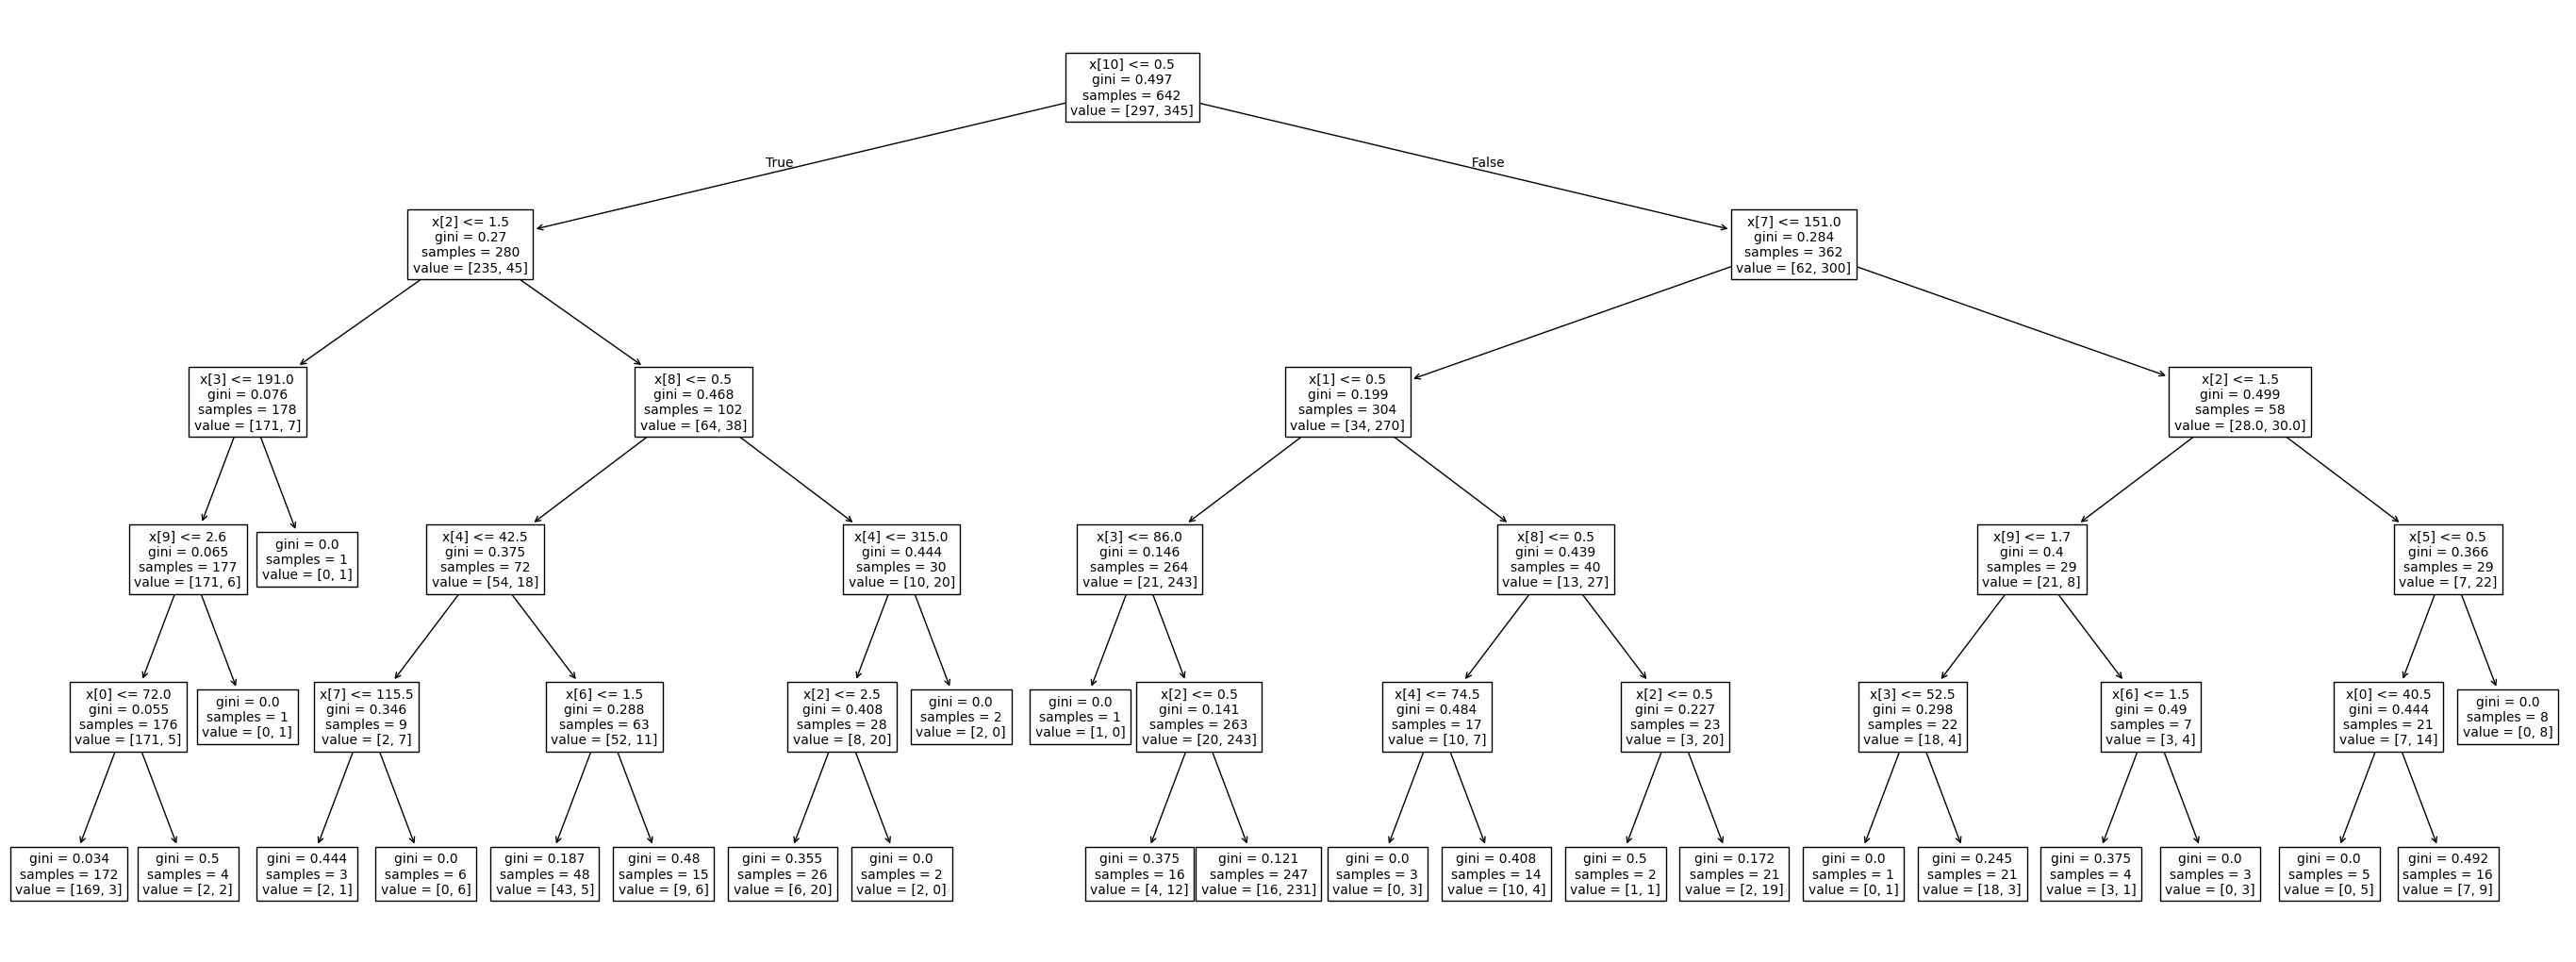

In [45]:
from sklearn import tree # Mengimpor modul tree dari Scikit-Learn untuk visualisasi pohon.
plt.subplots(figsize=(35, 13)) # Mengatur ukuran gambar untuk visualisasi pohon.
tree.plot_tree(model, fontsize=10) # Membuat visualisasi pohon keputusan dengan font ukuran 10.
plt.show() # Menampilkan grafik pohon keputusan.